# VERİ ÖN İŞLEME

Kütüphaneler içeri aktarılır:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

veri seti okunur, içe aktarılır:

In [34]:
data=pd.read_csv("eksikveriler.csv")
print(data)

   ulke  boy  kilo   yas cinsiyet
0    tr  130    30  10.0        e
1    tr  125    36  11.0        e
2    tr  135    34  10.0        k
3    tr  133    30   9.0        k
4    tr  129    38  12.0        e
5    tr  180    90  30.0        e
6    tr  190    80  25.0        e
7    tr  175    90  35.0        e
8    tr  177    60  22.0        k
9    us  185   105  33.0        e
10   us  165    55  27.0        k
11   us  155    50  44.0        k
12   us  160    58   NaN        k
13   us  162    59  41.0        k
14   us  167    62  55.0        k
15   fr  174    70  47.0        e
16   fr  193    90   NaN        e
17   fr  187    80  27.0        e
18   fr  183    88  28.0        e
19   fr  159    40  29.0        k
20   fr  164    66  32.0        k
21   fr  166    56  42.0        k


Veri seti küçük olduğu için eksik kısımları yazdırarak görebiliriz fakat büyük veri setlerinde bu mümkün değildir. Bu yüzden info() metodu ile bilgi alırız:

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ulke      22 non-null     object 
 1   boy       22 non-null     int64  
 2   kilo      22 non-null     int64  
 3   yas       20 non-null     float64
 4   cinsiyet  22 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1012.0+ bytes


Gördüğümüz yas sütununda 2 eksik veri vardır. Ya satırları sileceğiz dropna ile yada sci kit learn kütüphanesinden import metodunu kullanarak boşlukları doldurabiliriz. Ama biz pandas kütüphanesindeki fillna ile yapacağız:

In [36]:
ortalamayas=data["yas"].mean()# bu kod ile yas sütununun ortalama değerini bulduk. 
data["yas"].fillna(ortalamayas,inplace=True) #fillna doldurmak gibi anlamlara gelir. İnplace ise kalıcılık parametresi. 
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.00,e
1,tr,125,36,11.00,e
2,tr,135,34,10.00,k
3,tr,133,30,9.00,k
4,tr,129,38,12.00,e
5,tr,180,90,30.00,e
6,tr,190,80,25.00,e
7,tr,175,90,35.00,e
8,tr,177,60,22.00,k
9,us,185,105,33.00,e


Kategorik verileri numeric verilere çeviririz.elimizde 3 dataframe var : dataa,ulke,cins. Şimdi bu üçünü doğru şekilde birleştirmeliyiz. Data setinde hala eski ulke ve cinsiyet verileri bulunduğundan onu temizleyerek başlayalım.

In [43]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
ulke=data["ulke"]
ulke=le.fit_transform(ulke)
ulke=ohe.fit_transform(ulke.reshape(-1,1)).toarray()
cins=data["cinsiyet"]
cins=le.fit_transform(cins)
dataa=data.iloc[:,1:4]
dataa=pd.DataFrame(dataa,columns=["boy","kilo","yas"])
cins=pd.DataFrame(cins,columns=["cinsiyet"])
ulke=pd.DataFrame(ulke,columns=["fr","tr","us"])
s=pd.concat([ulke,cinsiyet],axis=1)
s1=pd.concat([s,dataa],axis=1)
s1

,fr,tr,us,cinsiyet,boy,kilo,yas
0,0.0,1.0,0.0,0,130,30,10.00
1,0.0,1.0,0.0,0,125,36,11.00
2,0.0,1.0,0.0,1,135,34,10.00
3,0.0,1.0,0.0,1,133,30,9.00
4,0.0,1.0,0.0,0,129,38,12.00
5,0.0,1.0,0.0,0,180,90,30.00
6,0.0,1.0,0.0,0,190,80,25.00
7,0.0,1.0,0.0,0,175,90,35.00
8,0.0,1.0,0.0,1,177,60,22.00
9,0.0,0.0,1.0,0,185,105,33.00


# Simple Linear Regression(basit doğrusal regresyon)

Bu aşamada hazırlama işlemi yaptığımız s1 setini kullanacağız. Bu seti eğitim ve test olmak üzere 2 parçaya böleceğiz. Bunu ise sklearn kütüphanesinde train test split ile yapacağız .O yüzden ilk olara onu import edelimm.

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(s1.iloc[:,0:6],s1.iloc[:,6],test_size=0.33,random_state=1)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     fr   tr   us  cinsiyet  boy  kilo
2   0.0  1.0  0.0         1  135    34
17  1.0  0.0  0.0         0  187    80
6   0.0  1.0  0.0         0  190    80
7   0.0  1.0  0.0         0  175    90
1   0.0  1.0  0.0         0  125    36
14  0.0  0.0  1.0         1  167    62
0   0.0  1.0  0.0         0  130    30
21  1.0  0.0  0.0         1  166    56
20  1.0  0.0  0.0         1  164    66
9   0.0  0.0  1.0         0  185   105
8   0.0  1.0  0.0         1  177    60
12  0.0  0.0  1.0         1  160    58
11  0.0  0.0  1.0         1  155    50
5   0.0  1.0  0.0         0  180    90
2     10.00
17    27.00
6     25.00
7     35.00
1     11.00
14    55.00
0     10.00
21    42.00
20    32.00
9     33.00
8     22.00
12    28.45
11    44.00
5     30.00
Name: yas, dtype: float64
     fr   tr   us  cinsiyet  boy  kilo
19  1.0  0.0  0.0         1  159    40
16  1.0  0.0  0.0         0  193    90
3   0.0  1.0  0.0         1  133    30
13  0.0  0.0  1.0         1  162    59
18  1.0  0.0  0.0         

Yukarıdaki kod bloğunda parantez içindeki ilk değer öğrenme(bağımsız), ikinci değer sonuç(bağımlı) ,test_size satır bazında ne miktarda bölüneceği, random_state ise belli skalada tekrarlanabilir şeyleri seçmesi demek. Şimd tahmin modelimizi oluşturmak için import işlemi ardından ise tahmin kodlarını yazalım:

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train) #bu satırda fit fonksiyonu öğrenme işlemi yapılır. Bu sayede doğrusal bir model oluşur.
sonuc=lr.predict(x_test)#bu satırda predict ile x_testten y_test tahmin edilir. 
sonuc

array([30.12562312, 34.84663218, 17.76559301, 39.86140836, 33.22210038,
       29.16833604, 39.61285714, 10.81004858])

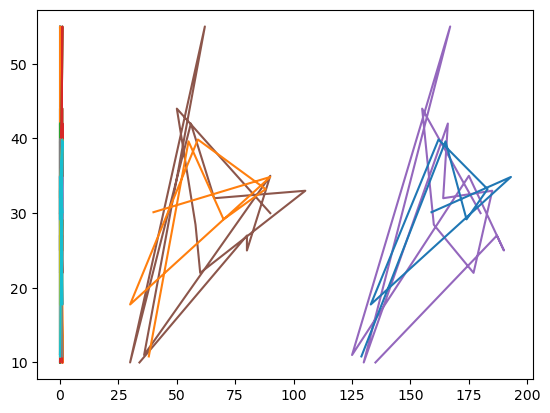

In [58]:
import matplotlib.pyplot as plt
plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))